# loan_prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df =  pd.read_csv('loan_prediction.csv')

In [4]:
#first five rows & columns
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan ,strategy='mean')
df['LoanAmount'] = si.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = si.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = si.fit_transform(df['Credit_History'].values.reshape(-1,1))

sim = SimpleImputer(missing_values=np.nan ,strategy= 'most_frequent')
df['Gender'] = sim.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = sim.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] =sim.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed'] =sim.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

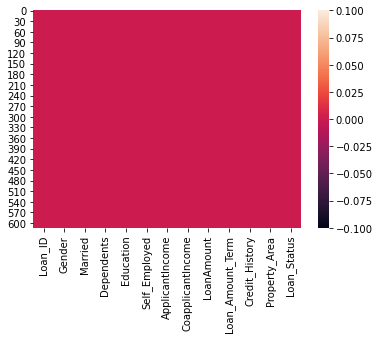

In [9]:
sns.heatmap(df.isnull())

There are no null values

In [10]:
# check the data type 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# summary statistics

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# correlation

In [12]:
df_cor = df.corr()
df_cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

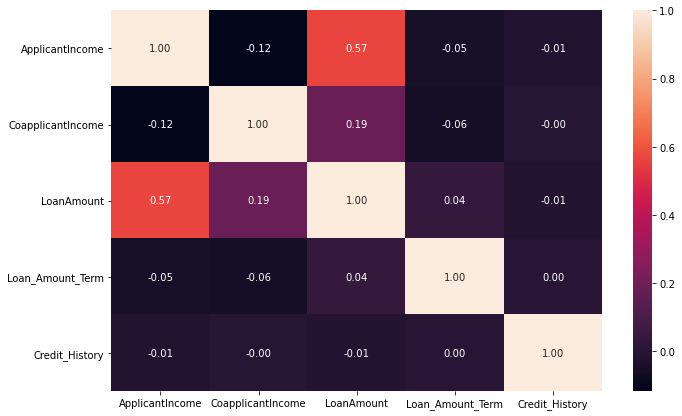

In [13]:
plt.figure(figsize = (11,7))
sns.heatmap(df_cor,annot=True ,fmt='0.2f')

# plotting outliers

<AxesSubplot:>

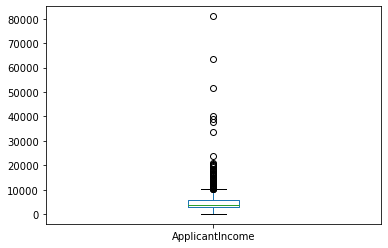

In [14]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

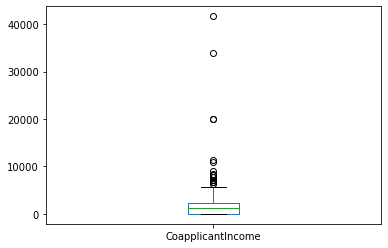

In [15]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

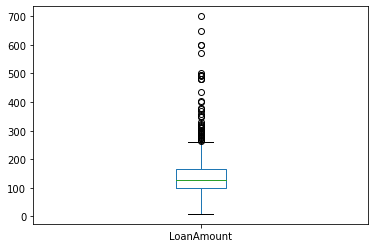

In [16]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

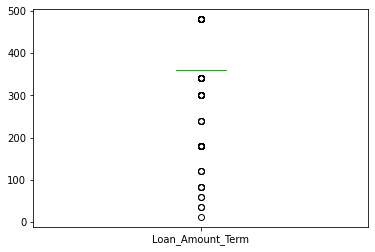

In [17]:
df['Loan_Amount_Term'].plot.box()

ApplicantIncome         AxesSubplot(0.125,0.749828;0.168478x0.130172)
CoapplicantIncome    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
LoanAmount           AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Loan_Amount_Term     AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Credit_History          AxesSubplot(0.125,0.593621;0.168478x0.130172)
dtype: object

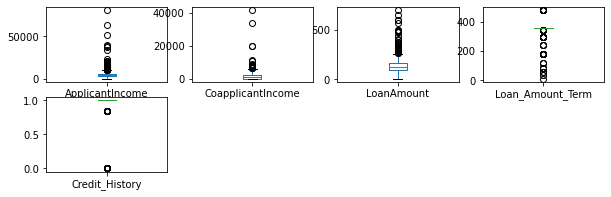

In [18]:
df.plot(kind = 'box', subplots=True , layout=(5,4) ,figsize = (10,8))

<AxesSubplot:xlabel='Gender', ylabel='count'>

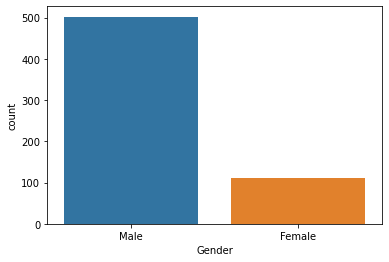

In [19]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

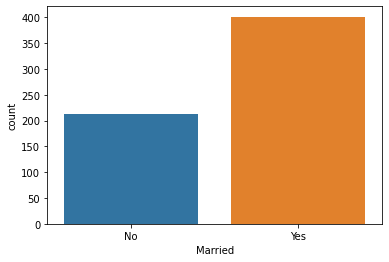

In [20]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

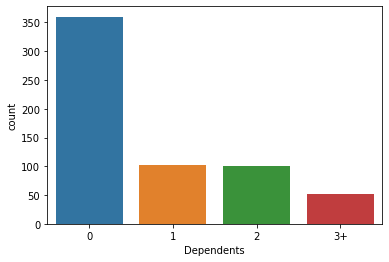

In [21]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

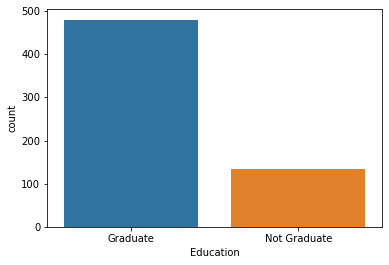

In [22]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

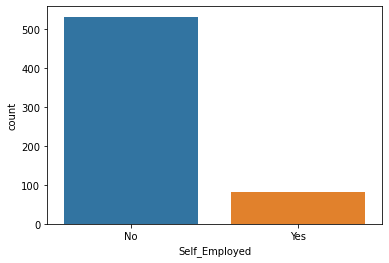

In [23]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

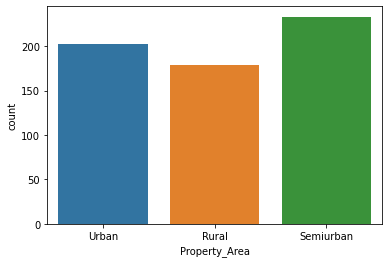

In [24]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

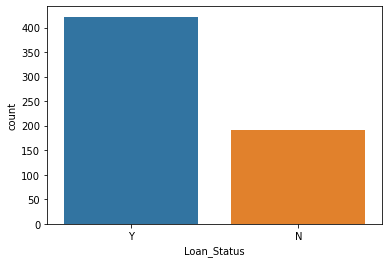

In [25]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

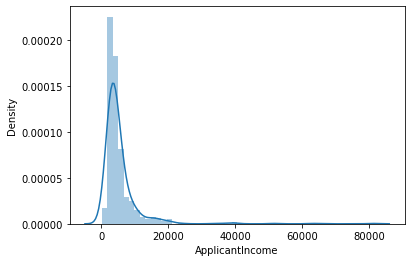

In [26]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

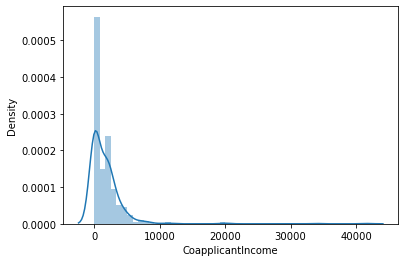

In [27]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

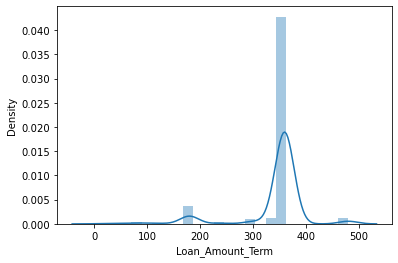

In [28]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

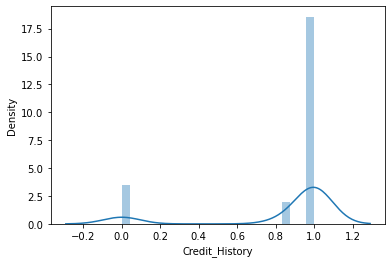

In [29]:
sns.distplot(df['Credit_History'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

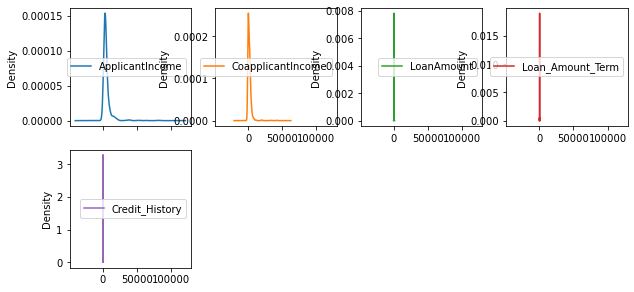

In [30]:
df.plot(kind='kde', subplots=True, layout=(4,4), figsize=(10,10))

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
# Total income
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0


In [33]:
# drop unnecessary columns
cols = ['Loan_ID', 'CoapplicantIncome']
df=df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,0.0,0.0,5849,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,0.0,0.0,4583,128.000000,360.0,1.0,0.0,0.0,6091.0
2,1.0,1.0,0.0,0.0,1.0,3000,66.000000,360.0,1.0,2.0,1.0,3000.0
3,1.0,1.0,0.0,1.0,0.0,2583,120.000000,360.0,1.0,2.0,1.0,4941.0
4,1.0,0.0,0.0,0.0,0.0,6000,141.000000,360.0,1.0,2.0,1.0,6000.0


# remove outliers

In [34]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 1.22329839, 0.67451931,
        0.18218376],
       [0.47234264, 0.72881553, 0.25346957, ..., 1.31851281, 1.48253724,
        0.14468416],
       [0.47234264, 0.72881553, 0.73780632, ..., 1.22329839, 0.67451931,
        0.62365632],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 1.22329839, 0.67451931,
        0.19947539],
       [0.47234264, 0.72881553, 1.24474546, ..., 1.22329839, 0.67451931,
        0.08651172],
       [2.11710719, 1.37208932, 0.73780632, ..., 0.04760721, 1.48253724,
        0.37835935]])

In [35]:
threshold = 3
len(np.where(z>3)[0])

45

In [36]:
df_new= df[(z<3).all(axis=1)]

In [37]:
df_new.skew()

Gender             -1.631113
Married            -0.630603
Dependents          1.047343
Education           1.314600
Self_Employed       2.238299
ApplicantIncome     2.131532
LoanAmount          1.140500
Loan_Amount_Term   -2.085132
Credit_History     -1.930333
Property_Area      -0.058012
Loan_Status        -0.813310
Total_Income        1.961896
dtype: float64

In [38]:
print("Old DataFrame",df.shape)
print("New DataFrame",df_new.shape)
print("Total_dropped_rows",df.shape[0] - df_new.shape[0])

Old DataFrame (614, 12)
New DataFrame (580, 12)
Total_dropped_rows 34


# Model Building

In [39]:
x=df_new.drop(columns=['Loan_Status'],axis=1)
y=df_new['Loan_Status']

In [40]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,0.0,0.0,5849,146.412162,360.0,1.000000,2.0,1.0,5849.000000
1,1.0,1.0,1.0,0.0,0.0,4583,128.000000,360.0,1.000000,0.0,0.0,6091.000000
2,1.0,1.0,0.0,0.0,1.0,3000,66.000000,360.0,1.000000,2.0,1.0,3000.000000
3,1.0,1.0,0.0,1.0,0.0,2583,120.000000,360.0,1.000000,2.0,1.0,4941.000000
4,1.0,0.0,0.0,0.0,0.0,6000,141.000000,360.0,1.000000,2.0,1.0,6000.000000
5,1.0,1.0,2.0,0.0,1.0,5417,267.000000,360.0,1.000000,2.0,1.0,9613.000000
6,1.0,1.0,0.0,1.0,0.0,2333,95.000000,360.0,1.000000,2.0,1.0,3849.000000
7,1.0,1.0,3.0,0.0,0.0,3036,158.000000,360.0,0.000000,1.0,0.0,5540.000000
8,1.0,1.0,2.0,0.0,0.0,4006,168.000000,360.0,1.000000,2.0,1.0,5532.000000
9,1.0,1.0,1.0,0.0,0.0,12841,349.000000,360.0,1.000000,1.0,0.0,23809.000000


# Train_test_split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

## Logistic Regression

In [42]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score 0.853448275862069
[[16 17]
 [ 0 83]]
              precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        33
         1.0       0.83      1.00      0.91        83

    accuracy                           0.85       116
   macro avg       0.92      0.74      0.78       116
weighted avg       0.88      0.85      0.83       116



## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred1 = rf.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy score 0.8448275862068966
[[20 13]
 [ 5 78]]
              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69        33
         1.0       0.86      0.94      0.90        83

    accuracy                           0.84       116
   macro avg       0.83      0.77      0.79       116
weighted avg       0.84      0.84      0.84       116



## SVC

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
ad_pred2 = svc.predict(x_test)
print('Accuracy',accuracy_score(y_test, ad_pred2))
print(confusion_matrix(y_test,ad_pred2))
print(classification_report(y_test, ad_pred2))

Accuracy 0.7155172413793104
[[ 0 33]
 [ 0 83]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.72      1.00      0.83        83

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.51      0.72      0.60       116



## DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test, preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test, preddt))

Accuracy 0.7758620689655172
[[23 10]
 [16 67]]
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64        33
         1.0       0.87      0.81      0.84        83

    accuracy                           0.78       116
   macro avg       0.73      0.75      0.74       116
weighted avg       0.79      0.78      0.78       116



## cross validation

In [46]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of logistic Regression model :",scr.mean())

Cross validation score of logistic Regression model : 0.8103448275862067


In [47]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.7931034482758621


In [48]:
scr = cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :', scr.mean())

Cross validation score of SVC model : 0.6879310344827586


In [49]:
scr = cross_val_score(dt, x, y, cv=5)
print('Cross validation score of DecisionTreeClassifier model :', scr.mean())

Cross validation score of DecisionTreeClassifier model : 0.7396551724137932


## Hyper parameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy']}

GCV = GridSearchCV(estimator=dtc,param_grid=parameters,scoring='accuracy',cv=5)
GCV.fit(x_train,y_train)

best_parameters = GCV.best_params_
print(best_parameters)
best_result = GCV.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7047218326320711


# ROC_AUC_CURVE

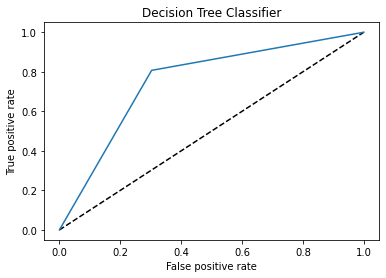

0.7520993063161738

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score = roc_auc_score(y_test,dt.predict(x_test))
auc_score

final accuracy is 75%

## Saving the model in pickle  format

In [52]:
import joblib
joblib.dump(dtc,"loan_prediction")

['loan_prediction']